In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats as stm
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection  import train_test_split

In [2]:
df= pd.read_csv('ECommerce _company_mobile sales.csv')
df

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [3]:
df.shape

(430, 16)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ROM,430.0,105.748837,63.164064,8.00,64.00,128.000,128.0000,512.00
RAM,430.0,5.320930,2.182635,1.00,4.00,4.000,6.0000,12.00
display_size,430.0,6.369767,0.369549,4.70,6.30,6.500,6.5000,7.60
num_rear_camera,430.0,2.904651,0.952350,1.00,2.00,3.000,4.0000,4.00
num_front_camera,430.0,1.044186,0.227280,1.00,1.00,1.000,1.0000,3.00
battery_capacity,430.0,4529.397674,986.907252,1800.00,4000.00,4500.000,5000.0000,7000.00
ratings,430.0,4.339302,0.151494,3.00,4.30,4.300,4.4000,4.60
num_of_ratings,430.0,23567.944186,56096.277784,4.00,745.00,5197.500,21089.2500,642373.00
sales_price,430.0,25433.234884,22471.926588,5742.00,11999.00,16989.500,28999.0000,157999.00
discount_percent,430.0,0.108000,0.073432,0.01,0.06,0.090,0.1600,0.44


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [6]:
data=df[['ROM','RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
           'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
           'discount_percent', 'sales']]

### P-Value & Coefficient

In [8]:
prices=data['sales']
features=data.drop('sales', axis=1)
x_train,x_test, y_train, y_test = train_test_split(features, prices, test_size = .2, random_state = 10)
x_incl = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl) 
results = model.fit()  

pd.DataFrame({'Coefficient': results.params , 'p-value': round(results.pvalues,3)})

,Coefficient,p-value
const,-8.706503,0.796
ROM,-0.012647,0.567
RAM,1.862601,0.002
display_size,-14.902100,0.000
num_rear_camera,0.177387,0.885
num_front_camera,3.895440,0.316
battery_capacity,-0.000015,0.992
ratings,22.111353,0.000
num_of_ratings,0.000897,0.000
sales_price,-0.000081,0.179


### EDA

In [9]:
corr = features.corr()  

C:\Users\DELL\AppData\Local\Temp\ipykernel_20708\1529001620.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True,square=True, ax=ax)


<AxesSubplot:>

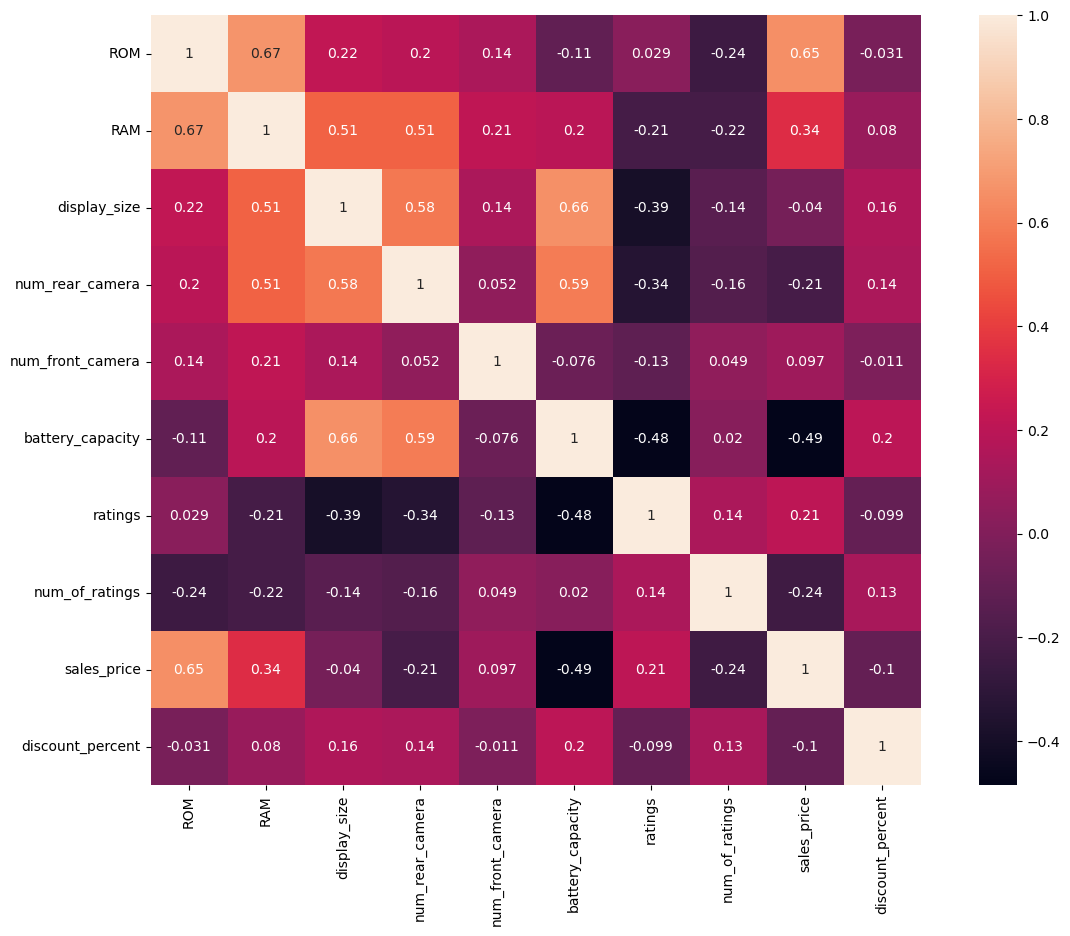

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True,square=True, ax=ax)

<AxesSubplot:xlabel='discount_percent', ylabel='count'>

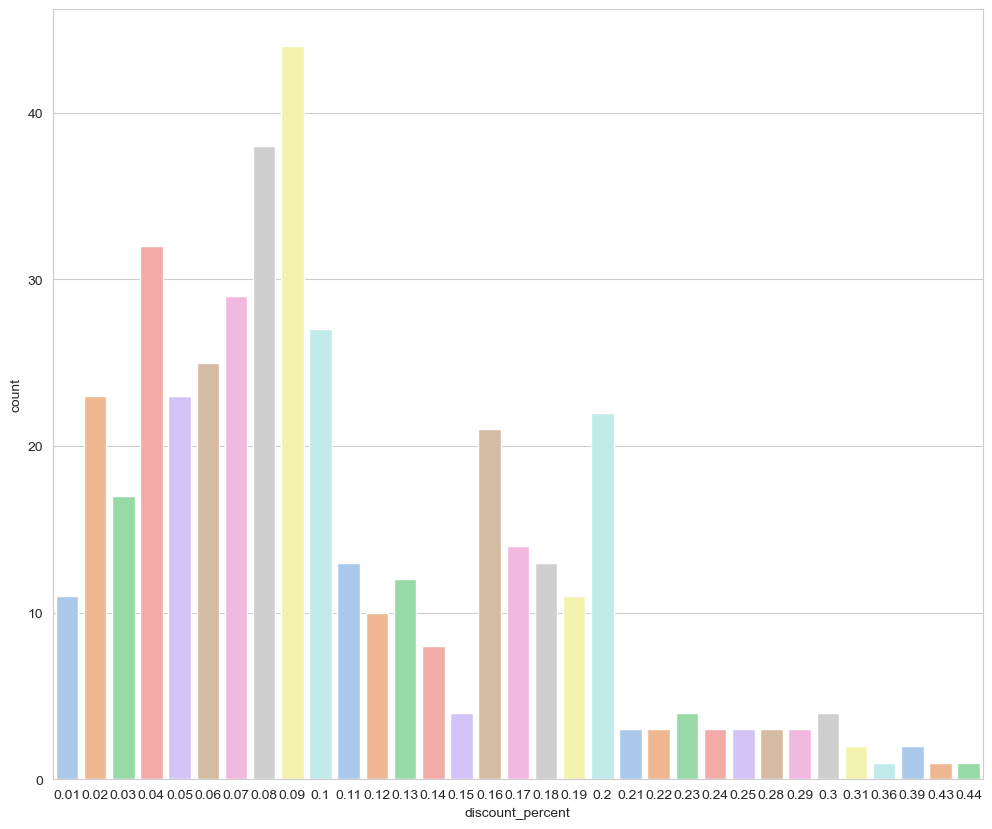

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.set_style('whitegrid')
sns.countplot(x='discount_percent',data=data,palette='pastel', ax=ax)

In [28]:
data.columns

Index(['ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

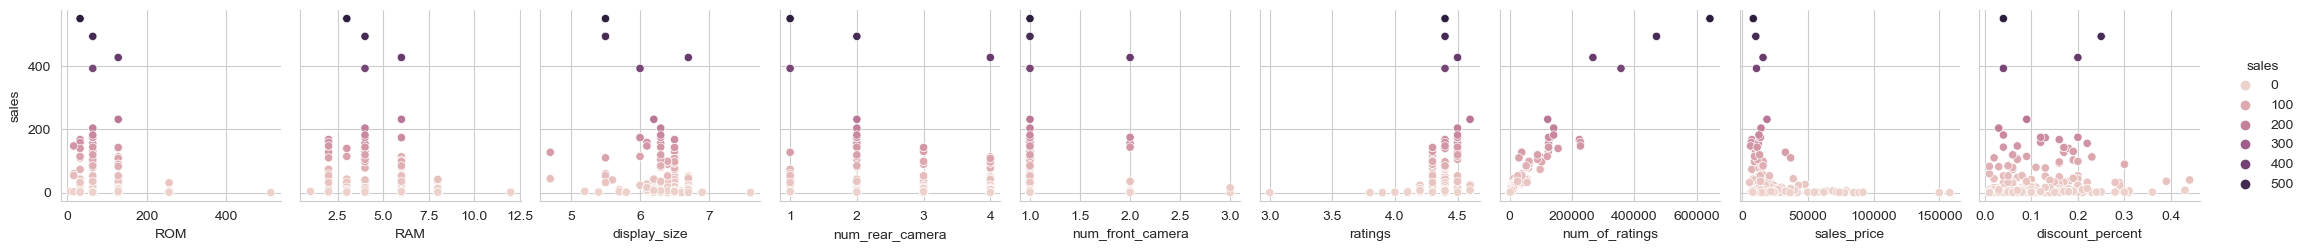

In [29]:
p = sns.pairplot(data=data,y_vars=['sales'], x_vars=['ROM','RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
'ratings', 'num_of_ratings', 'sales_price','discount_percent'], hue='sales')

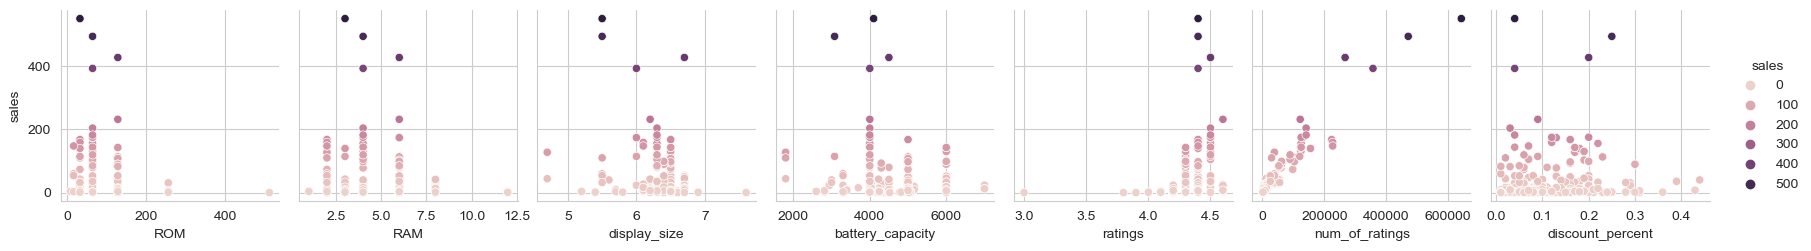

In [15]:
p_= sns.pairplot(data=data,y_vars=['sales'], x_vars=['ROM','RAM', 'display_size','battery_capacity', 'ratings', 'num_of_ratings', 'discount_percent'],hue='sales')

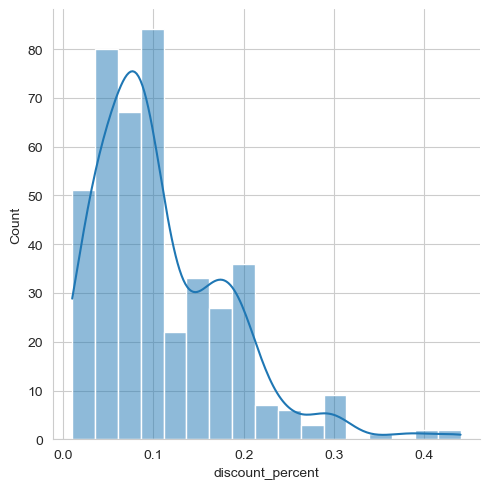

In [17]:
a=sns.displot(data=data['discount_percent'], kde=True)
a

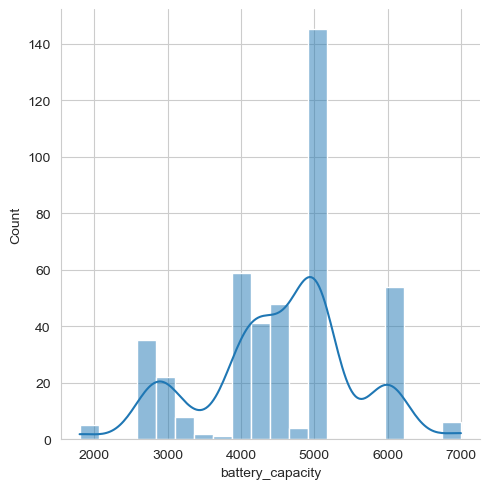

In [18]:
sns.displot(data=data['battery_capacity'], kde=True)

<AxesSubplot:xlabel='ROM', ylabel='count'>

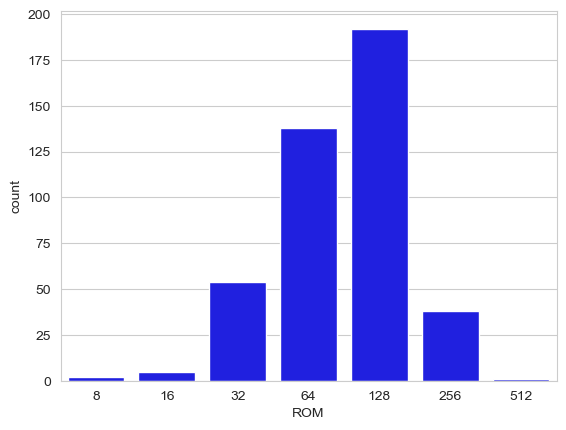

In [19]:
c=sns.countplot(x='ROM',color='blue', data=data)
c


### % Counts  Sales EDA

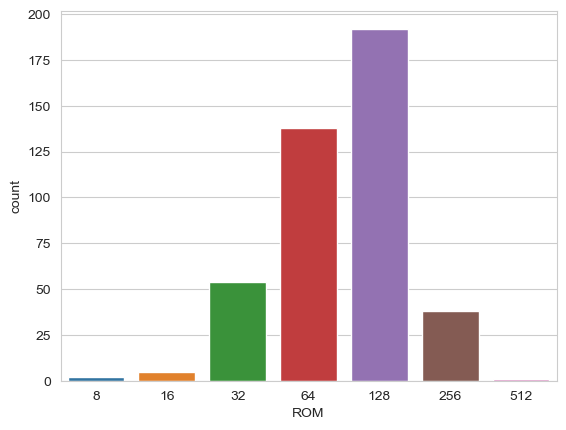

,counts,per100,percent
128,192,40.2%,0.446512
64,138,28.9%,0.320930
32,54,11.3%,0.125581
256,38,8.0%,0.088372
16,5,1.0%,0.011628
8,2,0.4%,0.004651
512,1,0.2%,0.002326


In [31]:
sns.countplot(x='ROM', data=data)
plt.show()

s_rom=data['ROM']
counts = s_rom.value_counts()
percent = s_rom.value_counts(normalize=True)
percent100 = s_rom.value_counts(normalize=True).mul(90).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per100': percent100,'percent': percent})

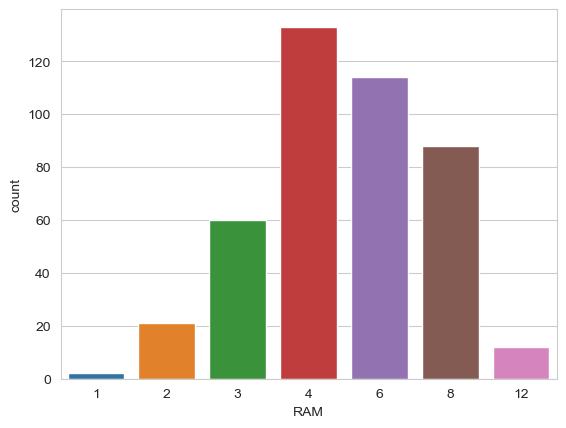

,counts,per100,percent
4,133,27.8%,0.309302
6,114,23.9%,0.265116
8,88,18.4%,0.204651
3,60,12.6%,0.139535
2,21,4.4%,0.048837
12,12,2.5%,0.027907
1,2,0.4%,0.004651


In [32]:
sns.countplot(x='RAM', data=data)
plt.show()

s_ram=data['RAM']
counts = s_ram.value_counts()
percent = s_ram.value_counts(normalize=True)
percent100 = s_ram.value_counts(normalize=True).mul(90).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per100': percent100,'percent': percent})

In [33]:
s_batt=data['battery_capacity']
counts = s_batt.value_counts()
percent = s_batt.value_counts(normalize=True)
percent100 = s_batt.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per100': percent100,'percent': percent})

,counts,per100,percent
5000,129,30.0%,0.300000
6000,54,12.6%,0.125581
4000,49,11.4%,0.113953
4500,42,9.8%,0.097674
2815,33,7.7%,0.076744
2942,18,4.2%,0.041860
4300,16,3.7%,0.037209
4200,9,2.1%,0.020930
3300,8,1.9%,0.018605
7000,6,1.4%,0.013953


In [34]:
s_ratings=data['ratings']
counts = s_ratings.value_counts()
percent = s_ratings.value_counts(normalize=True)
percent100 = s_ratings.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per100': percent100,'percent': percent})

,counts,per100,percent
4.3,181,42.1%,0.420930
4.4,79,18.4%,0.183721
4.5,55,12.8%,0.127907
4.2,55,12.8%,0.127907
4.6,37,8.6%,0.086047
4.0,10,2.3%,0.023256
4.1,8,1.9%,0.018605
3.9,3,0.7%,0.006977
3.0,1,0.2%,0.002326
3.8,1,0.2%,0.002326


In [35]:
df.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

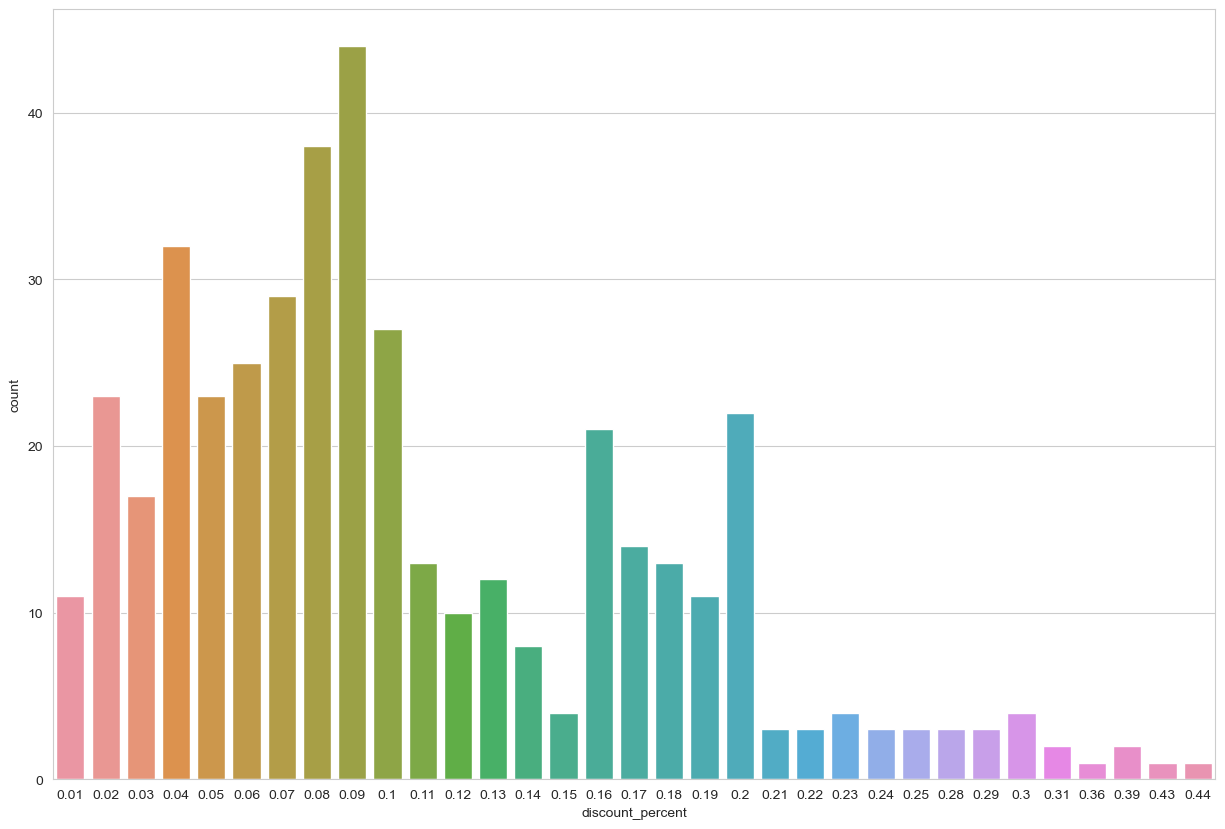

,counts,per100,percent
0.09,44,10.2%,0.102326
0.08,38,8.8%,0.088372
0.04,32,7.4%,0.074419
0.07,29,6.7%,0.067442
0.10,27,6.3%,0.062791
0.06,25,5.8%,0.058140
0.02,23,5.3%,0.053488
0.05,23,5.3%,0.053488
0.20,22,5.1%,0.051163
0.16,21,4.9%,0.048837


In [36]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='discount_percent', data=data)
plt.show()

s_dis=data['discount_percent']
counts = s_dis.value_counts()
percent = s_dis.value_counts(normalize=True)
percent100 = s_dis.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per100': percent100,'percent': percent}).head(15)